In [ ]:
import pandas as pd
from faker import Faker
import random

# Initialize faker
fake = Faker()

# Number of records
n = 5000

# Generate dataset
data = []
for _ in range(n):
    age = random.randint(18, 65)
    experience = random.randint(0, age - 18)  # ensures experience <= working age

    record = {
        "Name": fake.name(),
        "Age": age,
        "City": fake.city(),
        "Email": fake.email(),
        "Experience (years)": experience
    }
    data.append(record)

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv("customer_info_dataset_5000.csv", index=False)

print("✅ Customer dataset with 5000 records saved as customer_info_dataset_5000.csv")


ModuleNotFoundError: No module named 'faker'

In [ ]:
import pandas as pd
import random

# Sample names and cities for random generation
first_names = ["John", "Jane", "Alice", "Bob", "Charlie", "David", "Emma", "Sophia", "Liam", "Olivia"]
last_names = ["Smith", "Johnson", "Brown", "Taylor", "Anderson", "Thomas", "Jackson", "White", "Harris", "Martin"]
cities = ["New York", "Los Angeles", "Chicago", "Houston", "Miami", "Dallas", "San Francisco", "Seattle", "Boston", "Denver"]

# Number of records
n = 5000

# Generate dataset
data = []
for i in range(n):
    first = random.choice(first_names)
    last = random.choice(last_names)
    name = f"{first} {last}"

    age = random.randint(18, 65)
    city = random.choice(cities)
    email = f"{first.lower()}.{last.lower()}{random.randint(1,999)}@example.com"
    experience = random.randint(0, age - 18)  # experience cannot exceed working years

    record = {
        "Name": name,
        "Age": age,
        "City": city,
        "Email": email,
        "Experience (years)": experience
    }
    data.append(record)

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv("customer_info_dataset_5000.csv", index=False)

print("✅ Customer dataset with 5000 records saved as customer_info_dataset_5000.csv")


✅ Customer dataset with 5000 records saved as customer_info_dataset_5000.csv


In [ ]:
import pandas as pd
import itertools


# Load dataset (already generated earlier)
df = pd.read_csv("customer_info_dataset_5000.csv")

# Function to generate k-way combinations of fields
def generate_k_way(df, k):
    fields = df.columns.tolist()
    combos = list(itertools.combinations(fields, k))

    results = {}
    for combo in combos:
        # Group by the selected k fields and count occurrences
        grouped = df.groupby(list(combo)).size().reset_index(name="Count")
        results[combo] = grouped
    return results

# Generate 2-way, 3-way, and k-way
two_way = generate_k_way(df, 2)
three_way = generate_k_way(df, 3)
k_way = generate_k_way(df, 4)  # example: 4-way interactions

# Example: show first 5 rows of Age-City (2-way)
print("🔹 Example 2-way (Age, City):")
print(two_way[("Age", "City")].head())

# Example: show first 5 rows of Age-City-Experience (3-way)
print("\n🔹 Example 3-way (Age, City, Experience):")
print(three_way[("Age", "City", "Experience")].head())


🔹 Example 2-way (Age, City):
   Age     City  Count
0   18   Boston     21
1   18  Chicago     10
2   18   Dallas     14
3   18   Denver     13
4   18  Houston      4

🔹 Example 3-way (Age, City, Experience):


KeyError: ('Age', 'City', 'Experience')

In [ ]:
import pandas as pd
import random
import itertools

# -------------------------
# STEP 1: Generate dataset
# -------------------------
first_names = ["John", "Jane", "Alice", "Bob", "Charlie", "David", "Emma", "Sophia", "Liam", "Olivia"]
last_names = ["Smith", "Johnson", "Brown", "Taylor", "Anderson", "Thomas", "Jackson", "White", "Harris", "Martin"]
cities = ["New York", "Los Angeles", "Chicago", "Houston", "Miami", "Dallas", "San Francisco", "Seattle", "Boston", "Denver"]

n = 5000
data = []

for i in range(n):
    first = random.choice(first_names)
    last = random.choice(last_names)
    name = f"{first} {last}"
    age = random.randint(18, 65)
    city = random.choice(cities)
    email = f"{first.lower()}.{last.lower()}{random.randint(1,999)}@example.com"
    experience = random.randint(0, age - 18)

    data.append({
        "Name": name,
        "Age": age,
        "City": city,
        "Email": email,
        "Experience (years)": experience
    })

df = pd.DataFrame(data)

# Save dataset
df.to_csv("customer_info_dataset_5000.csv", index=False)
print("✅ Dataset saved as customer_info_dataset_5000.csv")

# -------------------------
# STEP 2: k-way generator
# -------------------------
def generate_k_way(df, k):
    fields = df.columns.tolist()
    combos = list(itertools.combinations(fields, k))

    results = {}
    for combo in combos:
        grouped = df.groupby(list(combo)).size().reset_index(name="Count")
        results[combo] = grouped
    return results

# -------------------------
# STEP 3: Generate 2-way, 3-way, and example k-way
# -------------------------
two_way = generate_k_way(df, 2)
three_way = generate_k_way(df, 3)
k_way = generate_k_way(df, 4)   # Example: 4-way

# -------------------------
# STEP 4: Explore results
# -------------------------
print("\nAvailable 2-way keys:")
print(list(two_way.keys())[:5], "...")  # show first 5 only

print("\nAvailable 3-way keys:")
print(list(three_way.keys())[:5], "...")

# Example: 2-way (Age, City)
print("\n🔹 Example 2-way (Age, City):")
print(two_way[("Age", "City")].head())

# Example: 3-way (Age, City, Experience (years))
print("\n🔹 Example 3-way (Age, City, Experience (years)):")
print(three_way[("Age", "City", "Experience (years)")].head())



✅ Dataset saved as customer_info_dataset_5000.csv

Available 2-way keys:
[('Name', 'Age'), ('Name', 'City'), ('Name', 'Email'), ('Name', 'Experience (years)'), ('Age', 'City')] ...

Available 3-way keys:
[('Name', 'Age', 'City'), ('Name', 'Age', 'Email'), ('Name', 'Age', 'Experience (years)'), ('Name', 'City', 'Email'), ('Name', 'City', 'Experience (years)')] ...

🔹 Example 2-way (Age, City):
   Age     City  Count
0   18   Boston     10
1   18  Chicago     15
2   18   Dallas      6
3   18   Denver     13
4   18  Houston     10

🔹 Example 3-way (Age, City, Experience (years)):
   Age     City  Experience (years)  Count
0   18   Boston                   0     10
1   18  Chicago                   0     15
2   18   Dallas                   0      6
3   18   Denver                   0     13
4   18  Houston                   0     10


In [ ]:
import pandas as pd
import random
import itertools

# -------------------------
# STEP 1: Generate dataset
# -------------------------
first_names = ["John", "Jane", "Alice", "Bob", "Charlie", "David", "Emma", "Sophia", "Liam", "Olivia"]
last_names = ["Smith", "Johnson", "Brown", "Taylor", "Anderson", "Thomas", "Jackson", "White", "Harris", "Martin"]
cities = ["New York", "Los Angeles", "Chicago", "Houston", "Miami", "Dallas", "San Francisco", "Seattle", "Boston", "Denver"]

n = 5000
data = []

for i in range(n):
    first = random.choice(first_names)
    last = random.choice(last_names)
    name = f"{first} {last}"
    age = random.randint(18, 65)
    city = random.choice(cities)
    email = f"{first.lower()}.{last.lower()}{random.randint(1,999)}@example.com"
    experience = random.randint(0, age - 18)

    data.append({
        "Name": name,
        "Age": age,
        "City": city,
        "Email": email,
        "Experience (years)": experience
    })

df = pd.DataFrame(data)
df.to_csv("customer_info_dataset_5000.csv", index=False)
print("✅ Dataset saved as customer_info_dataset_5000.csv")

# -------------------------
# STEP 2: Generate 2-way and 3-way splits
# -------------------------
columns = df.columns.tolist()

# Function to create split for all records
def generate_splits(df, k):
    splits = []
    for idx, row in df.iterrows():
        for combo in itertools.combinations(columns, k):
            record = {col: row[col] for col in combo}
            splits.append(record)
    return pd.DataFrame(splits)

# 2-way split
two_way_split = generate_splits(df, 2)
two_way_split.to_csv("customer_2_way_split.csv", index=False)
print("✅ 2-way split saved as customer_2_way_split.csv")

# 3-way split
three_way_split = generate_splits(df, 3)
three_way_split.to_csv("customer_3_way_split.csv", index=False)
print("✅ 3-way split saved as customer_3_way_split.csv")

# -------------------------
# STEP 3: Preview
# -------------------------
print("\n🔹 2-way split preview:")
print(two_way_split.head())

print("\n🔹 3-way split preview:")
print(three_way_split.head())



✅ Dataset saved as customer_info_dataset_5000.csv
✅ 2-way split saved as customer_2_way_split.csv
✅ 3-way split saved as customer_3_way_split.csv

🔹 2-way split preview:
         Name   Age   City                      Email  Experience (years)
0  Jane White  18.0    NaN                        NaN                 NaN
1  Jane White   NaN  Miami                        NaN                 NaN
2  Jane White   NaN    NaN  jane.white841@example.com                 NaN
3  Jane White   NaN    NaN                        NaN                 0.0
4         NaN  18.0  Miami                        NaN                 NaN

🔹 3-way split preview:
         Name   Age   City                      Email  Experience (years)
0  Jane White  18.0  Miami                        NaN                 NaN
1  Jane White  18.0    NaN  jane.white841@example.com                 NaN
2  Jane White  18.0    NaN                        NaN                 0.0
3  Jane White   NaN  Miami  jane.white841@example.com             

In [ ]:
import pandas as pd
import random
import itertools
from sklearn.model_selection import KFold

# -------------------------
# STEP 1: Generate dataset with proper credentials
# -------------------------
first_names = ["John", "Jane", "Alice", "Bob", "Charlie", "David", "Emma", "Sophia", "Liam", "Olivia"]
last_names = ["Smith", "Johnson", "Brown", "Taylor", "Anderson", "Thomas", "Jackson", "White", "Harris", "Martin"]
cities = ["New York", "Los Angeles", "Chicago", "Houston", "Miami", "Dallas", "San Francisco", "Seattle", "Boston", "Denver"]
domains = ["example.com", "testmail.com", "mail.com", "sample.org"]

n = 5000
data = []

for i in range(n):
    first = random.choice(first_names)
    last = random.choice(last_names)
    name = f"{first} {last}"
    age = random.randint(18, 65)
    city = random.choice(cities)
    email = f"{first.lower()}.{last.lower()}{random.randint(1,999)}@{random.choice(domains)}"
    experience = random.randint(0, age - 18)

    data.append({
        "Name": name,
        "Age": age,
        "City": city,
        "Email": email,
        "Experience (years)": experience
    })

df = pd.DataFrame(data)
df.to_csv("customer_info_dataset_5000.csv", index=False)
print("✅ Dataset saved as customer_info_dataset_5000.csv")

# -------------------------
# STEP 2: 2-way and 3-way splits
# -------------------------
columns = df.columns.tolist()

def generate_splits(df, k):
    """Generate k-way attribute splits per record"""
    splits = []
    for _, row in df.iterrows():
        for combo in itertools.combinations(columns, k):
            record = {col: row[col] for col in combo}
            splits.append(record)
    return pd.DataFrame(splits)

# 2-way split
two_way_split = generate_splits(df, 2)
two_way_split.to_csv("customer_2_way_split.csv", index=False)
print("✅ 2-way split saved as customer_2_way_split.csv")

# 3-way split
three_way_split = generate_splits(df, 3)
three_way_split.to_csv("customer_3_way_split.csv", index=False)
print("✅ 3-way split saved as customer_3_way_split.csv")

# -------------------------
# STEP 3: k-fold split
# -------------------------
k = 5  # 5-fold cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)

for fold, (train_index, test_index) in enumerate(kf.split(df), 1):
    df_train = df.iloc[train_index]
    df_test = df.iloc[test_index]
    df_train.to_csv(f"customer_train_fold{fold}.csv", index=False)
    df_test.to_csv(f"customer_test_fold{fold}.csv", index=False)
    print(f"✅ Fold {fold}: train and test CSVs saved")

# -------------------------
# STEP 4: Preview
# -------------------------
print("\n🔹 Original dataset preview:")
print(df.head())

print("\n🔹 2-way split preview:")
print(two_way_split.head())

print("\n🔹 3-way split preview:")
print(three_way_split.head())


✅ Dataset saved as customer_info_dataset_5000.csv
✅ 2-way split saved as customer_2_way_split.csv
✅ 3-way split saved as customer_3_way_split.csv
✅ Fold 1: train and test CSVs saved
✅ Fold 2: train and test CSVs saved
✅ Fold 3: train and test CSVs saved
✅ Fold 4: train and test CSVs saved
✅ Fold 5: train and test CSVs saved

🔹 Original dataset preview:
              Name  Age           City                          Email  \
0      Liam Thomas   55        Houston      liam.thomas604@sample.org   
1     Alice Taylor   44        Chicago       alice.taylor307@mail.com   
2      Liam Taylor   52  San Francisco        liam.taylor578@mail.com   
3  Charlie Jackson   50       New York  charlie.jackson295@sample.org   
4    Sophia Martin   51  San Francisco       sophia.martin46@mail.com   

   Experience (years)  
0                  19  
1                   3  
2                  14  
3                   0  
4                  12  

🔹 2-way split preview:
          Name   Age     City         

In [ ]:
import pandas as pd
import random
import itertools
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# -------------------------
# STEP 1: Generate dataset with proper credentials
# -------------------------
first_names = ["John", "Jane", "Alice", "Bob", "Charlie", "David", "Emma", "Sophia", "Liam", "Olivia"]
last_names = ["Smith", "Johnson", "Brown", "Taylor", "Anderson", "Thomas", "Jackson", "White", "Harris", "Martin"]
cities = ["New York", "Los Angeles", "Chicago", "Houston", "Miami", "Dallas", "San Francisco", "Seattle", "Boston", "Denver"]
domains = ["example.com", "testmail.com", "mail.com", "sample.org"]

n = 5000
data = []

for i in range(n):
    first = random.choice(first_names)
    last = random.choice(last_names)
    name = f"{first} {last}"
    age = random.randint(18, 65)
    city = random.choice(cities)
    email = f"{first.lower()}.{last.lower()}{random.randint(1,999)}@{random.choice(domains)}"
    experience = random.randint(0, age - 18)

    # Synthetic target column for classification
    target = random.randint(0,1)

    data.append({
        "Name": name,
        "Age": age,
        "City": city,
        "Email": email,
        "Experience (years)": experience,
        "Target": target
    })

df = pd.DataFrame(data)
df.to_csv("customer_info_dataset_5000.csv", index=False)
print("✅ Original dataset saved")

# -------------------------
# STEP 2: Function to generate k-way splits
# -------------------------
columns = ["Age", "City", "Email", "Experience (years)", "Name"]

def generate_splits(df, k):
    splits = []
    for _, row in df.iterrows():
        for combo in itertools.combinations(columns, k):
            record = {col: row[col] for col in combo}
            record["Target"] = row["Target"]
            splits.append(record)
    return pd.DataFrame(splits)

# 2-way split
two_way_split = generate_splits(df, 2)
two_way_split.to_csv("customer_2_way_split.csv", index=False)
print("✅ 2-way split saved")

# 3-way split
three_way_split = generate_splits(df, 3)
three_way_split.to_csv("customer_3_way_split.csv", index=False)
print("✅ 3-way split saved")

# -------------------------
# STEP 3: Function to compute k-fold accuracy
# -------------------------
def compute_accuracy(df_split):
    df_encoded = df_split.copy()
    for col in df_encoded.columns:
        if df_encoded[col].dtype == 'object':
            df_encoded[col] = df_encoded[col].astype('category').cat.codes

    X = df_encoded.drop("Target", axis=1)
    y = df_encoded["Target"]

    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    fold_accuracies = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model = DecisionTreeClassifier(random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        fold_accuracies.append(accuracy_score(y_test, y_pred))

    return sum(fold_accuracies)/len(fold_accuracies)

# -------------------------
# STEP 4: Compute accuracy for 2-way and 3-way splits
# -------------------------
accuracy_2_way = compute_accuracy(two_way_split)
accuracy_3_way = compute_accuracy(three_way_split)

print(f"\n🔹 2-way split average accuracy: {accuracy_2_way:.4f}")
print(f"🔹 3-way split average accuracy: {accuracy_3_way:.4f}")


✅ Original dataset saved
✅ 2-way split saved
✅ 3-way split saved

🔹 2-way split average accuracy: 0.5567
🔹 3-way split average accuracy: 0.6050


Confusion Matrix:
 [[2555    0]
 [   0 2445]]


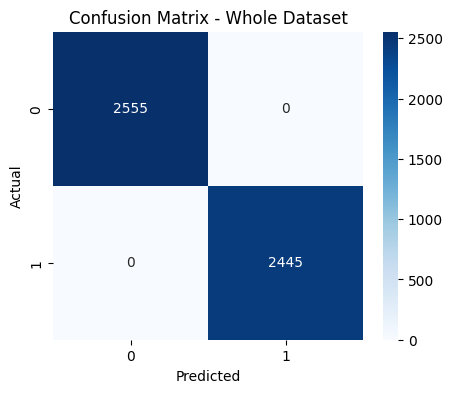

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (or use df from previous steps)
# df = pd.read_csv("customer_info_dataset_5000.csv")

# Encode categorical features
df_encoded = df.copy()
for col in ["Name", "City", "Email"]:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

# Features and target
features = ["Age", "City", "Email", "Experience (years)", "Name"]
X = df_encoded[features]
y = df_encoded["Target"]

# Train a Decision Tree on the whole dataset
model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)
y_pred = model.predict(X)

# Confusion matrix
cm = confusion_matrix(y, y_pred)
print("Confusion Matrix:\n", cm)

# Plot the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Whole Dataset")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
import pandas as pd
import random
import itertools
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# -------------------------
# STEP 1: Generate synthetic dataset
# -------------------------
first_names = ["John", "Jane", "Alice", "Bob", "Charlie", "David", "Emma", "Sophia", "Liam", "Olivia"]
last_names = ["Smith", "Johnson", "Brown", "Taylor", "Anderson", "Thomas", "Jackson", "White", "Harris", "Martin"]
cities = ["New York", "Los Angeles", "Chicago", "Houston", "Miami", "Dallas", "San Francisco", "Seattle", "Boston", "Denver"]
domains = ["example.com", "testmail.com", "mail.com", "sample.org"]

n = 5000
data = []

for i in range(n):
    first = random.choice(first_names)
    last = random.choice(last_names)
    name = f"{first} {last}"
    age = random.randint(18, 65)
    city = random.choice(cities)
    email = f"{first.lower()}.{last.lower()}{random.randint(1,999)}@{random.choice(domains)}"
    experience = random.randint(0, age - 18)

    # Synthetic target column
    target = random.randint(0,1)

    data.append({
        "Name": name,
        "Age": age,
        "City": city,
        "Email": email,
        "Experience (years)": experience,
        "Target": target
    })

df = pd.DataFrame(data)
df.to_csv("customer_info_dataset_5000.csv", index=False)
print("✅ Original dataset saved as customer_info_dataset_5000.csv")

# -------------------------
# STEP 2: Function to generate k-way splits
# -------------------------
columns = ["Age", "City", "Email", "Experience (years)", "Name"]

def generate_splits(df, k):
    splits = []
    for _, row in df.iterrows():
        for combo in itertools.combinations(columns, k):
            record = {col: row[col] for col in combo}
            record["Target"] = row["Target"]
            splits.append(record)
    return pd.DataFrame(splits)

# Generate 2-way and 3-way splits
two_way_split = generate_splits(df, 2)
two_way_split.to_csv("customer_2_way_split.csv", index=False)
print("✅ 2-way split saved")

three_way_split = generate_splits(df, 3)
three_way_split.to_csv("customer_3_way_split.csv", index=False)
print("✅ 3-way split saved")

# -------------------------
# STEP 3: Function to compute k-fold accuracy
# -------------------------
def compute_accuracy(df_split, k_folds=5):
    df_encoded = df_split.copy()
    for col in df_encoded.columns:
        if df_encoded[col].dtype == 'object':
            df_encoded[col] = df_encoded[col].astype('category').cat.codes

    X = df_encoded.drop("Target", axis=1)
    y = df_encoded["Target"]

    kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
    fold_accuracies = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model = DecisionTreeClassifier(random_state=42)  # Correctly assigned
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        fold_accuracies.append(accuracy_score(y_test, y_pred))

    return sum(fold_accuracies)/len(fold_accuracies)

# -------------------------
# STEP 4: Compute accuracies
# -------------------------
accuracy_orig = compute_accuracy(df)
accuracy_2_way = compute_accuracy(two_way_split)
accuracy_3_way = compute_accuracy(three_way_split)

print(f"\n🔹 Original dataset average accuracy: {accuracy_orig:.4f}")
print(f"🔹 2-way split average accuracy: {accuracy_2_way:.4f}")
print(f"🔹 3-way split average accuracy: {accuracy_3_way:.4f}")

# -------------------------
# STEP 5: Save 5-fold train/test splits
# -------------------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for fold, (train_index, test_index) in enumerate(kf.split(df), 1):
    df_train = df.iloc[train_index]
    df_test = df.iloc[test_index]
    df_train.to_csv(f"customer_train_fold{fold}.csv", index=False)
    df_test.to_csv(f"customer_test_fold{fold}.csv", index=False)
    print(f"✅ Fold {fold}: train and test CSVs saved")

# -------------------------
# STEP 6: Preview datasets
# -------------------------
print("\n🔹 Original dataset preview:")
print(df.head())

print("\n🔹 2-way split preview:")
print(two_way_split.head())

print("\n🔹 3-way split preview:")
print(three_way_split.head())


✅ Original dataset saved as customer_info_dataset_5000.csv
✅ 2-way split saved
✅ 3-way split saved

🔹 Original dataset average accuracy: 0.4996
🔹 2-way split average accuracy: 0.5747
🔹 3-way split average accuracy: 0.6354
✅ Fold 1: train and test CSVs saved
✅ Fold 2: train and test CSVs saved
✅ Fold 3: train and test CSVs saved
✅ Fold 4: train and test CSVs saved
✅ Fold 5: train and test CSVs saved

🔹 Original dataset preview:
            Name  Age           City                        Email  \
0    David Brown   42  San Francisco   david.brown422@example.com   
1    Jane Taylor   37       New York  jane.taylor183@testmail.com   
2   Olivia White   29        Houston     olivia.white404@mail.com   
3  Jane Anderson   53    Los Angeles  jane.anderson493@sample.org   
4    Alice White   34    Los Angeles   alice.white188@example.com   

   Experience (years)  Target  
0                   4       1  
1                   3       0  
2                   9       0  
3                   0     

In [ ]:
import pandas as pd
import random
import itertools
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------
# STEP 1: Generate synthetic dataset
# -------------------------
first_names = ["John", "Jane", "Alice", "Bob", "Charlie", "David", "Emma", "Sophia", "Liam", "Olivia"]
last_names = ["Smith", "Johnson", "Brown", "Taylor", "Anderson", "Thomas", "Jackson", "White", "Harris", "Martin"]
cities = ["New York", "Los Angeles", "Chicago", "Houston", "Miami", "Dallas", "San Francisco", "Seattle", "Boston", "Denver"]
domains = ["example.com", "testmail.com", "mail.com", "sample.org"]

n = 5000
data = []

for i in range(n):
    first = random.choice(first_names)
    last = random.choice(last_names)
    name = f"{first} {last}"
    age = random.randint(18, 65)
    city = random.choice(cities)
    email = f"{first.lower()}.{last.lower()}{random.randint(1,999)}@{random.choice(domains)}"
    experience = random.randint(0, age - 18)

    # Synthetic target column
    target = random.randint(0,1)

    data.append({
        "Name": name,
        "Age": age,
        "City": city,
        "Email": email,
        "Experience (years)": experience,
        "Target": target
    })

df = pd.DataFrame(data)

# -------------------------
# STEP 2: Function to generate k-way splits
# -------------------------
columns = ["Age", "City", "Email", "Experience (years)", "Name"]

def generate_splits(df, k):
    splits = []
    for _, row in df.iterrows():
        for combo in itertools.combinations(columns, k):
            record


In [ ]:
import pandas as pd
import random
import itertools
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------
# STEP 1: Generate synthetic dataset
# -------------------------
first_names = ["John", "Jane", "Alice", "Bob", "Charlie", "David", "Emma", "Sophia", "Liam", "Olivia"]
last_names = ["Smith", "Johnson", "Brown", "Taylor", "Anderson", "Thomas", "Jackson", "White", "Harris", "Martin"]
cities = ["New York", "Los Angeles", "Chicago", "Houston", "Miami", "Dallas", "San Francisco", "Seattle", "Boston", "Denver"]
domains = ["example.com", "testmail.com", "mail.com", "sample.org"]

n = 5000
data = []

for i in range(n):
    first = random.choice(first_names)
    last = random.choice(last_names)
    name = f"{first} {last}"
    age = random.randint(18, 65)
    city = random.choice(cities)
    email = f"{first.lower()}.{last.lower()}{random.randint(1,999)}@{random.choice(domains)}"
    experience = random.randint(0, age - 18)

    # Synthetic target column
    target = random.randint(0,1)

    data.append({
        "Name": name,
        "Age": age,
        "City": city,
        "Email": email,
        "Experience (years)": experience,
        "Target": target
    })

df = pd.DataFrame(data)

# -------------------------
# STEP 2: Generate 2-way and 3-way splits
# -------------------------
columns = ["Age", "City", "Email", "Experience (years)", "Name"]

def generate_splits(df, k):
    splits = []
    for _, row in df.iterrows():
        for combo in itertools.combinations(columns, k):
            record = {col: row[col] for col in combo}
            record["Target"] = row["Target"]
            splits.append(record)
    return pd.DataFrame(splits)

two_way_split = generate_splits(df, 2)
three_way_split = generate_splits(df, 3)

# -------------------------
# STEP 3: Encode categorical features
# -------------------------
def encode_categorical(df_split):
    df_encoded = df_split.copy()
    for col in df_encoded.columns:
        if df_encoded[col].dtype == 'object':
            df_encoded[col] = df_encoded[col].astype('category').cat.codes
    return df_encoded

df_encoded = encode_categorical(df)
two_way_encoded = encode_categorical(two_way_split)
three_way_encoded = encode_categorical(three_way_split)

# -------------------------
# STEP 4: Compute k-fold confusion matrix
# -------------------------
def kfold_confusion_matrix(df_encoded, k_folds=5):
    X = df_encoded.drop("Target",_


SyntaxError: incomplete input (ipython-input-3258945831.py, line 79)

In [ ]:
import pandas as pd
import random
import itertools
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------
# STEP 1: Generate synthetic dataset
# -------------------------
first_names = ["John", "Jane", "Alice", "Bob", "Charlie", "David", "Emma", "Sophia", "Liam", "Olivia"]
last_names = ["Smith", "Johnson", "Brown", "Taylor", "Anderson", "Thomas", "Jackson", "White", "Harris", "Martin"]
cities = ["New York", "Los Angeles", "Chicago", "Houston", "Miami", "Dallas", "San Francisco", "Seattle", "Boston", "Denver"]
domains = ["example.com", "testmail.com", "mail.com", "sample.org"]

n = 5000
data = []

for i in range(n):
    first = random.choice(first_names)
    last = random.choice(last_names)
    name = f"{first} {last}"
    age = random.randint(18, 65)
    city = random.choice(cities)
    email = f"{first.lower()}.{last.lower()}{random.randint(1,999)}@{random.choice(domains)}"
    experience = random.randint(0, age - 18)

    target = random.randint(0,1)

    data.append({
        "Name": name,
        "Age": age,
        "City": city,
        "Email": email,
        "Experience (years)": experience,
        "Target": target
    })

df = pd.DataFrame(data)

# -------------------------
# STEP 2: Generate 2-way and 3-way splits
# -------------------------
columns = ["Age", "City", "Email", "Experience (years)", "Name"]

def generate_splits(df, k):
    splits = []
    for _, row in df.iterrows():
        for combo in itertools.combinations(columns, k):
            record = {col: row[col] for col in combo}
            record["Target"] = row["Target"]
            splits.append(record)
    return pd.DataFrame(splits)

two_way_split = generate_splits(df, 2)
three_way_split = generate_splits(df, 3)

# -------------------
